In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv(filepath_or_buffer='base-de-dados/dados.csv')

Perguntas:
- Homens ganham mais que mulheres? Sim.
- Qual faixa de idade ganha mais?
- Pessoas de qual estado ganham mais?
- Pessoas de qual cor ganham mais?
- Pessoas de qual faixa de altura ganham mais?
- Pessoas com qual tempo de estudo ganham mais?

## Homens ganham mais que mulheres?

- Visualisando algumas medidas de tendencia central e de dispersão

In [3]:
sex_renda = dados.groupby('Sexo')
sex_renda['Renda'].describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
0,53250.0,2192.441596,3590.312915,0.0,800.0,1350.0,2300.0,200000.0
1,23590.0,1566.847393,2570.663414,0.0,700.0,900.0,1500.0,120000.0



<font color=orange>**NOTA**:<font><font color=black>
até o momento parece que o homem ganha mais que a mulher. No entanto precisamos analisar a distribuição dos dados e tbm sua disperção para tirar melhores conclusões.

---  

- Pegando uma faixa salarial menor, mas é onde a maioria das pessoas se encontram. Assim podemos excluir valores que são discrepantes que acabam influenciando algumas medidas.

In [4]:
sex_renda_10000 = dados.query('Renda<=10000').groupby('Sexo')['Renda'].describe()
sex_renda_10000

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
0,52143.0,1835.233512,1723.037722,0.0,800.0,1300.0,2100.0,10000.0
1,23323.0,1384.580071,1498.206427,0.0,670.0,900.0,1500.0,10000.0



<font color=orange>**NOTA**:<font><font color=black>
mesmo excluindo valores discrepantes podemos observar que as medidas estatisticas sobre o salario dos homens e das mulheres nos dizem que o homem ganha mais que as mulheres.

--- 

- Calculando o coeficiente de variação para entender se os dados sobre a renda do grupo masculino são mais dispersos que do grupo feminino.

In [5]:
CV = (sex_renda_10000['std']/sex_renda_10000['mean']).round(2)*100
CV

Sexo
0     94.0
1    108.0
dtype: float64


<font color=orange>**NOTA**:<font><font color=black>
o coeficiente de variação nos informa que os dados salariais dos homens são menos dispersos que os dados salariais das mulheres.

---

- Visualiando a distribuição dos dados salariais de cada gênero. Vamos analisar num intervalo de 0 a 10000 mil para poder excluir valores discrepantes.

In [6]:
sal_m, sal_f = sex_renda

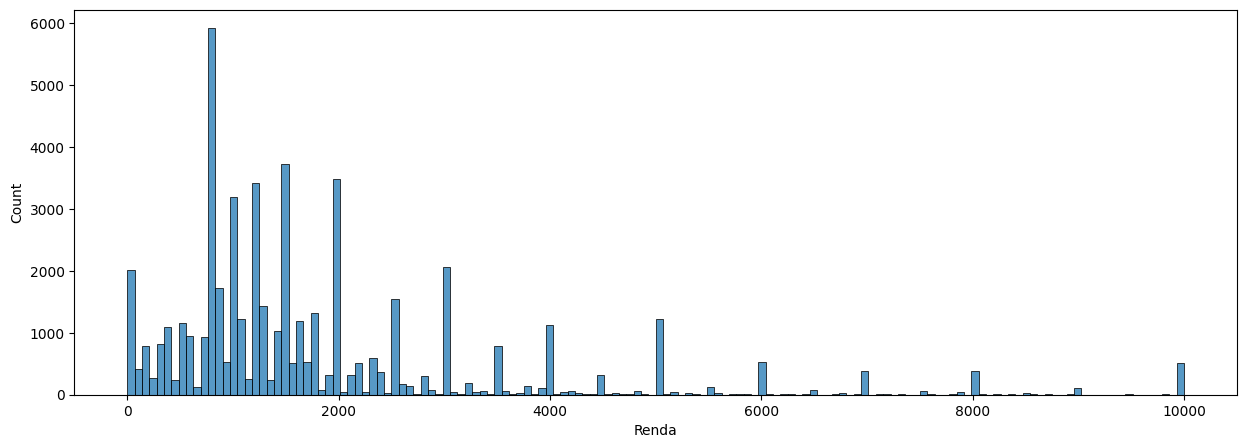

In [7]:
# Sexo masculino
plt.subplots(figsize=(15, 5))
sns.histplot(sal_m[1].query('Renda<=10000')['Renda'])
plt.show()

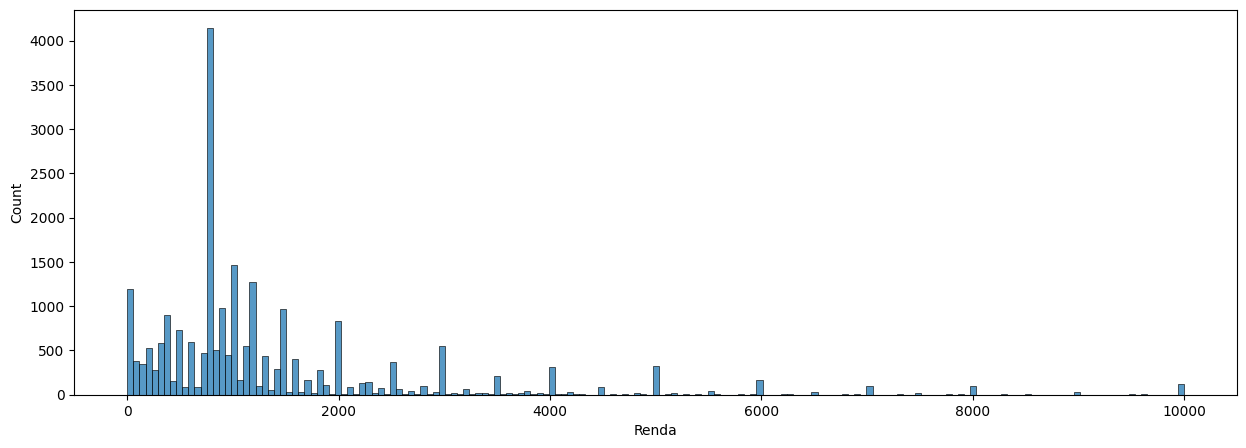

In [8]:
# Sexo feminino
plt.subplots(figsize=(15, 5))
sns.histplot(sal_f[1].query('Renda<=10000')['Renda'])
plt.show()


<font color=orange>**NOTA**:<font><font color=black>
os gráficos nos mostram que proporcionalmente existe mais homens entre a faixa de 1.000,00 e 2.000,00 do que mulheres. E que mesmo depois de retiramos alguns valores discrepantes ainda existe alguns valores discrepantes que acabam elevando a média salarial de cada genero.

---

- Vamos criar uma tabela que nos mostra progressivamente a porcentagem de pessoas que se encontram abaixo de um x valor salarial.

In [12]:
labels = []
m = []
f = []

for x in [n for n in range(0, 10001, 1000)] + [50000, 100000, 150000, 200000]:
    condicao = f'Renda <= {x}'
    for df in dados.groupby('Sexo'):
        if df[0] == 0:
            m.append(round(df[1].query(condicao).shape[0]/df[1].shape[0] * 100, 3))
        else:
            f.append(round(df[1].query(condicao).shape[0]/df[1].shape[0] * 100, 3))
            labels.append(condicao)

In [13]:
tabela = pd.DataFrame(data={'Masculino':m, 'Feminino':f}, index=labels)

In [14]:
tabela

,Masculino,Feminino
Renda <= 0,3.437,4.396
Renda <= 1000,37.572,58.131
Renda <= 2000,73.040,83.001
Renda <= 3000,84.712,90.047
Renda <= 4000,89.681,93.446
Renda <= 5000,93.057,95.617
Renda <= 6000,94.588,96.757
Renda <= 7000,95.557,97.444
Renda <= 8000,96.578,98.084
Renda <= 9000,96.913,98.279



<font color=orange>**NOTA**:<font><font color=black>
essa tabela nos mostra com mais clareza que geralmente os homens que participaram dessa pesquisa ganham mais que as mulheres.

 --- 

## Qual faixa de idade ganha mais?

- Primeiro precisamos criar as faixas de idade.

In [51]:
faixa = [13, 18, 23, 28, 33, 38, 42, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93, 99]
idade_class = pd.cut(x=dados.Idade,
                     bins=faixa,
                     include_lowest=None)

dados['Idade Class'] = idade_class

 ---

- Analisando algumas medidas de tendencia central e dispersão.

In [52]:
dados.groupby('Idade Class')['Renda'].describe()

,count,mean,std,min,25%,50%,75%,max
Idade Class,,,,,,,,
"(13, 18]",214.0,835.546729,425.362397,0.0,600.0,800.0,1000.0,2200.0
"(18, 23]",2291.0,1101.796595,852.593150,0.0,788.0,1000.0,1300.0,25000.0
"(23, 28]",5554.0,1522.130537,1649.018879,0.0,788.0,1181.0,1800.0,48000.0
"(28, 33]",9032.0,1893.750775,2298.986647,0.0,800.0,1200.0,2000.0,50000.0
"(33, 38]",10786.0,2013.995735,2499.815458,0.0,800.0,1254.0,2200.0,36000.0
"(38, 42]",8648.0,2058.345282,3559.620186,0.0,788.0,1270.5,2000.0,200000.0
"(42, 48]",12365.0,2156.307238,3110.946272,0.0,788.0,1300.0,2300.0,100000.0
"(48, 53]",10041.0,2266.702520,4061.645771,0.0,788.0,1250.0,2300.0,200000.0
"(53, 58]",7683.0,2156.936353,3445.887007,0.0,788.0,1200.0,2150.0,90000.0
